# BREAST CANCER DATASET
El objetivo de este dataset es clasificar los tumores en benignos o malignos en base a sus características. 
Tiempo de ejecución aproximado: 1 minuto

In [1]:
# Importamos las librerias
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import time

inicio = time.time()

In [2]:
#Importamos los datos
data = pd.read_csv("breastcancer.csv", sep = ',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploración de datos
El primer paso para resolver el caso es realizar una exploración del dataset para conocer cuantas variables y registros contiene, el tipo de datos de cada variable, los estadísticos principales, etc. De esta manera se adquirirá un mayor conocimiento sobre el problema que guiará las decisiones que se tomen a lo largo de este. 

In [3]:
print('----------Descripción de los datos----------------')
data.info()

----------Descripción de los datos----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 

In [4]:
print('---------Porcentaje de NA por variable------------')
p_NA = (data.isna().sum()/len(data)*100).sort_values(ascending=False)
print(p_NA)

print('\n--------- Numero de categorías por variable ------------')
u = data.nunique().sort_values()
print(u)

---------Porcentaje de NA por variable------------
Unnamed: 32                100.0
compactness_se               0.0
fractal_dimension_worst      0.0
symmetry_worst               0.0
concave points_worst         0.0
concavity_worst              0.0
compactness_worst            0.0
smoothness_worst             0.0
area_worst                   0.0
perimeter_worst              0.0
texture_worst                0.0
radius_worst                 0.0
fractal_dimension_se         0.0
symmetry_se                  0.0
concave points_se            0.0
concavity_se                 0.0
id                           0.0
diagnosis                    0.0
area_se                      0.0
perimeter_se                 0.0
texture_se                   0.0
radius_se                    0.0
fractal_dimension_mean       0.0
symmetry_mean                0.0
concave points_mean          0.0
concavity_mean               0.0
compactness_mean             0.0
smoothness_mean              0.0
area_mean                

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

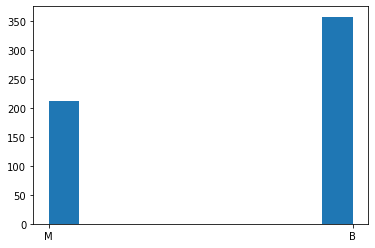

In [5]:
plt.hist(data['diagnosis'])

## Resultados de la exploración
Este dataset registra las características de distintos tumores de pecho, tales como la simetria, el radio, la textura, etc y clasifica los tumores en benignos o malignos. El objetivo del caso es obtener un modelo que anticipe si un tumor es benigno o maligno en base a estas características. A través del histograma puede verse que se trata de un dataset balanceado ya que tiene un número parecido de casos malignos y benignos. Tiene alrededor de 500 registros y 30 variables por lo que será oportuno hacer un análisis de correlaciones para descartar variables. 

Respecto a las variables del dataset:
- A excepción de dos variables todos los datos son de tipo float64 y por lo tanto no necesitarán transformaciones para aplicar los modelos. 
- La variable id es de tipo int. Sin embargo, no resulta una variable de interés ya que unicamente identifica al paciente. Por lo tanto se eliminará del dataset. 
- La variable diagnosis es la variable objetivo, ya que indica si el tumor es benigno o maligno. Es de tipo objeto, por lo que necesitará una transformación a tipo numérica. En el estudio de categorías por variable puede verse que únicamente tiene dos categorías y por tanto se podrá convertir en una variable booleana. Si el tumor es maligno (M) se registrará un 1 y si es benigno (B) un 0. 
- La variable Unnamed:32 presenta un 100% de valores missing. Debido a esto y al propio nombre se deduce que se trata de un error en la lectura de los datos y por tanto se eliminará la variable. 
- El resto de variables son numericas y presentan un gran numero de categorías respecto al total de registro, tratandose de variables continuas que pueden emplearse en los modelos. 

In [6]:
def preCleaning(data):
    data.drop("Unnamed: 32", axis = 1, inplace = True)
    data.drop("id", axis = 1, inplace = True)
    data['diagnosis'].replace({'M':1,'B':0}, inplace = True)
    return data 


In [7]:
data = preCleaning(data)

## Estudio de correlacion 
El estudio de correlación entre variables resulta muy útil para poder reducir la dimensionalidad de un dataset. Este estudio puede realizarse de una manera muy sencilla mediante una matriz de correlación. De esta manera puede encontrarse la correlación entre las variables y con la variable objetivo. Por ejemplo, como puede verse en la figura inferior, el radio y área del tumor tienen una alta correlación (el área de un círculo es pi*radio^2). Sin embargo, al tratarse la variable objetivo de una variable categórica no resulta adecuado utilizar una matriz de correlación. 

Por este motivo se ha estudiado mediante un boxplot que permita conocer la relacion de "diagnosis" con el resto de variables. 

<AxesSubplot:>

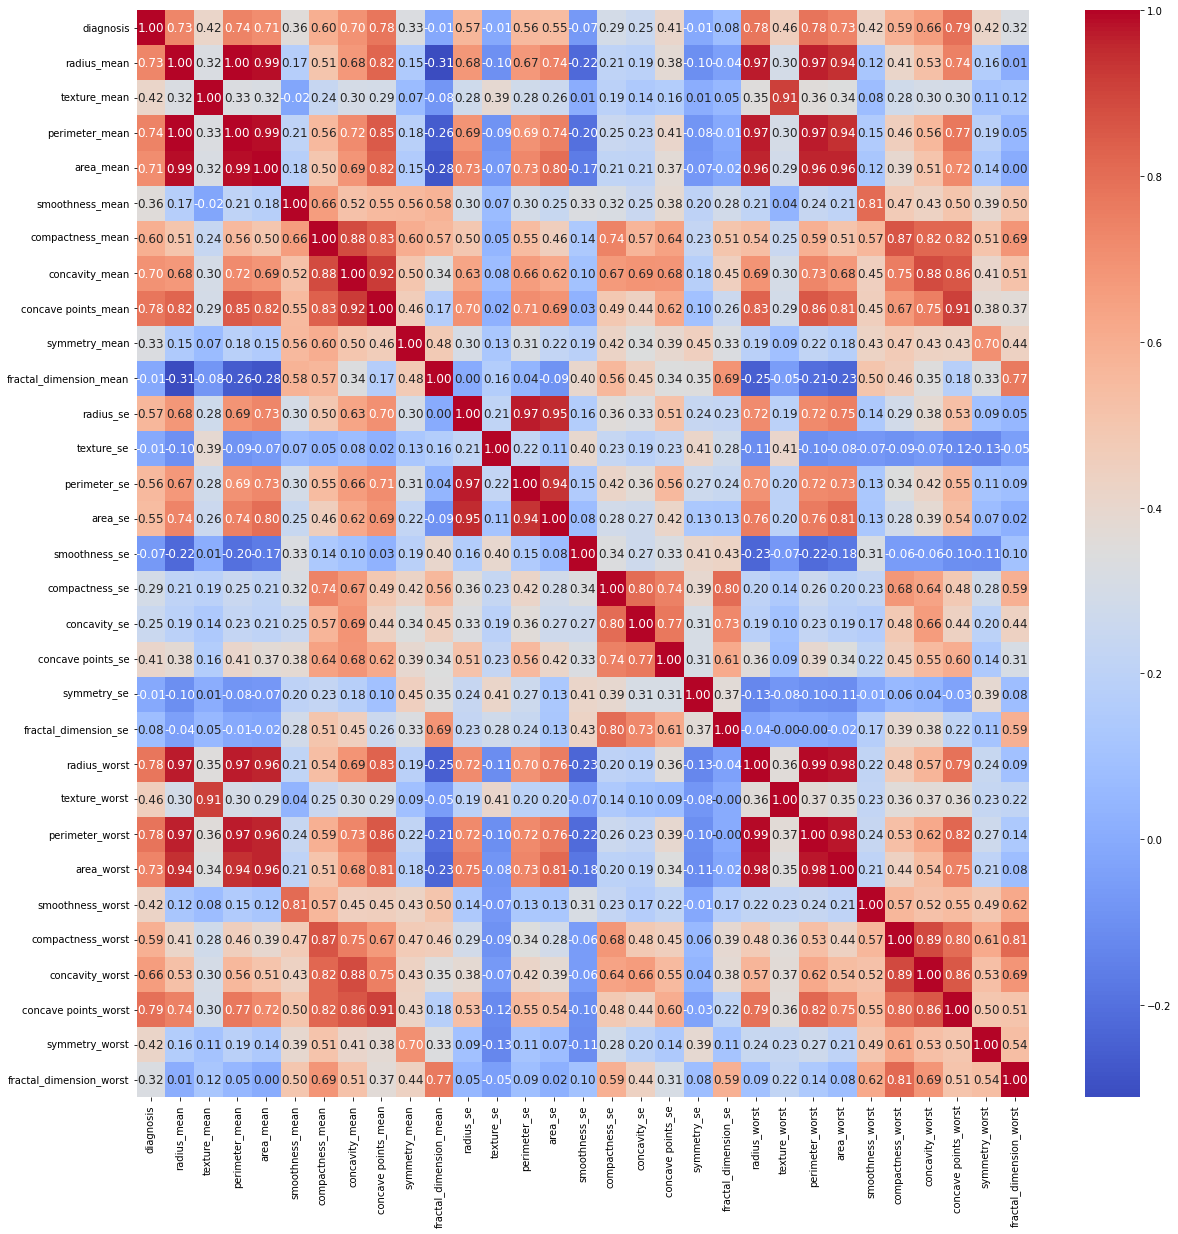

In [8]:
#Estudio de correlación
features = data.columns.values   
correlacion = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlacion, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= features, yticklabels= features, cmap= 'coolwarm')

In [9]:
estimadores = data.drop('diagnosis',axis=1).columns.values 

In [10]:
def plot_explore(categorias,data):

    dim1 = 4 #elegír el número de figuras en la dirección horizontal
    dim2 = math.ceil(len(categorias)/dim1)
    kk = 0
    
    fig, axs = plt.subplots(dim2,dim1, figsize=(5*dim1, 5*dim2))
    for ii in range(0,dim1):
        for jj in range(0,dim2): 
            kk+=1
            if kk == len(categorias):
                break   
            sns.boxplot(ax=axs[jj, ii],x='diagnosis', y=categorias[kk], data=data)

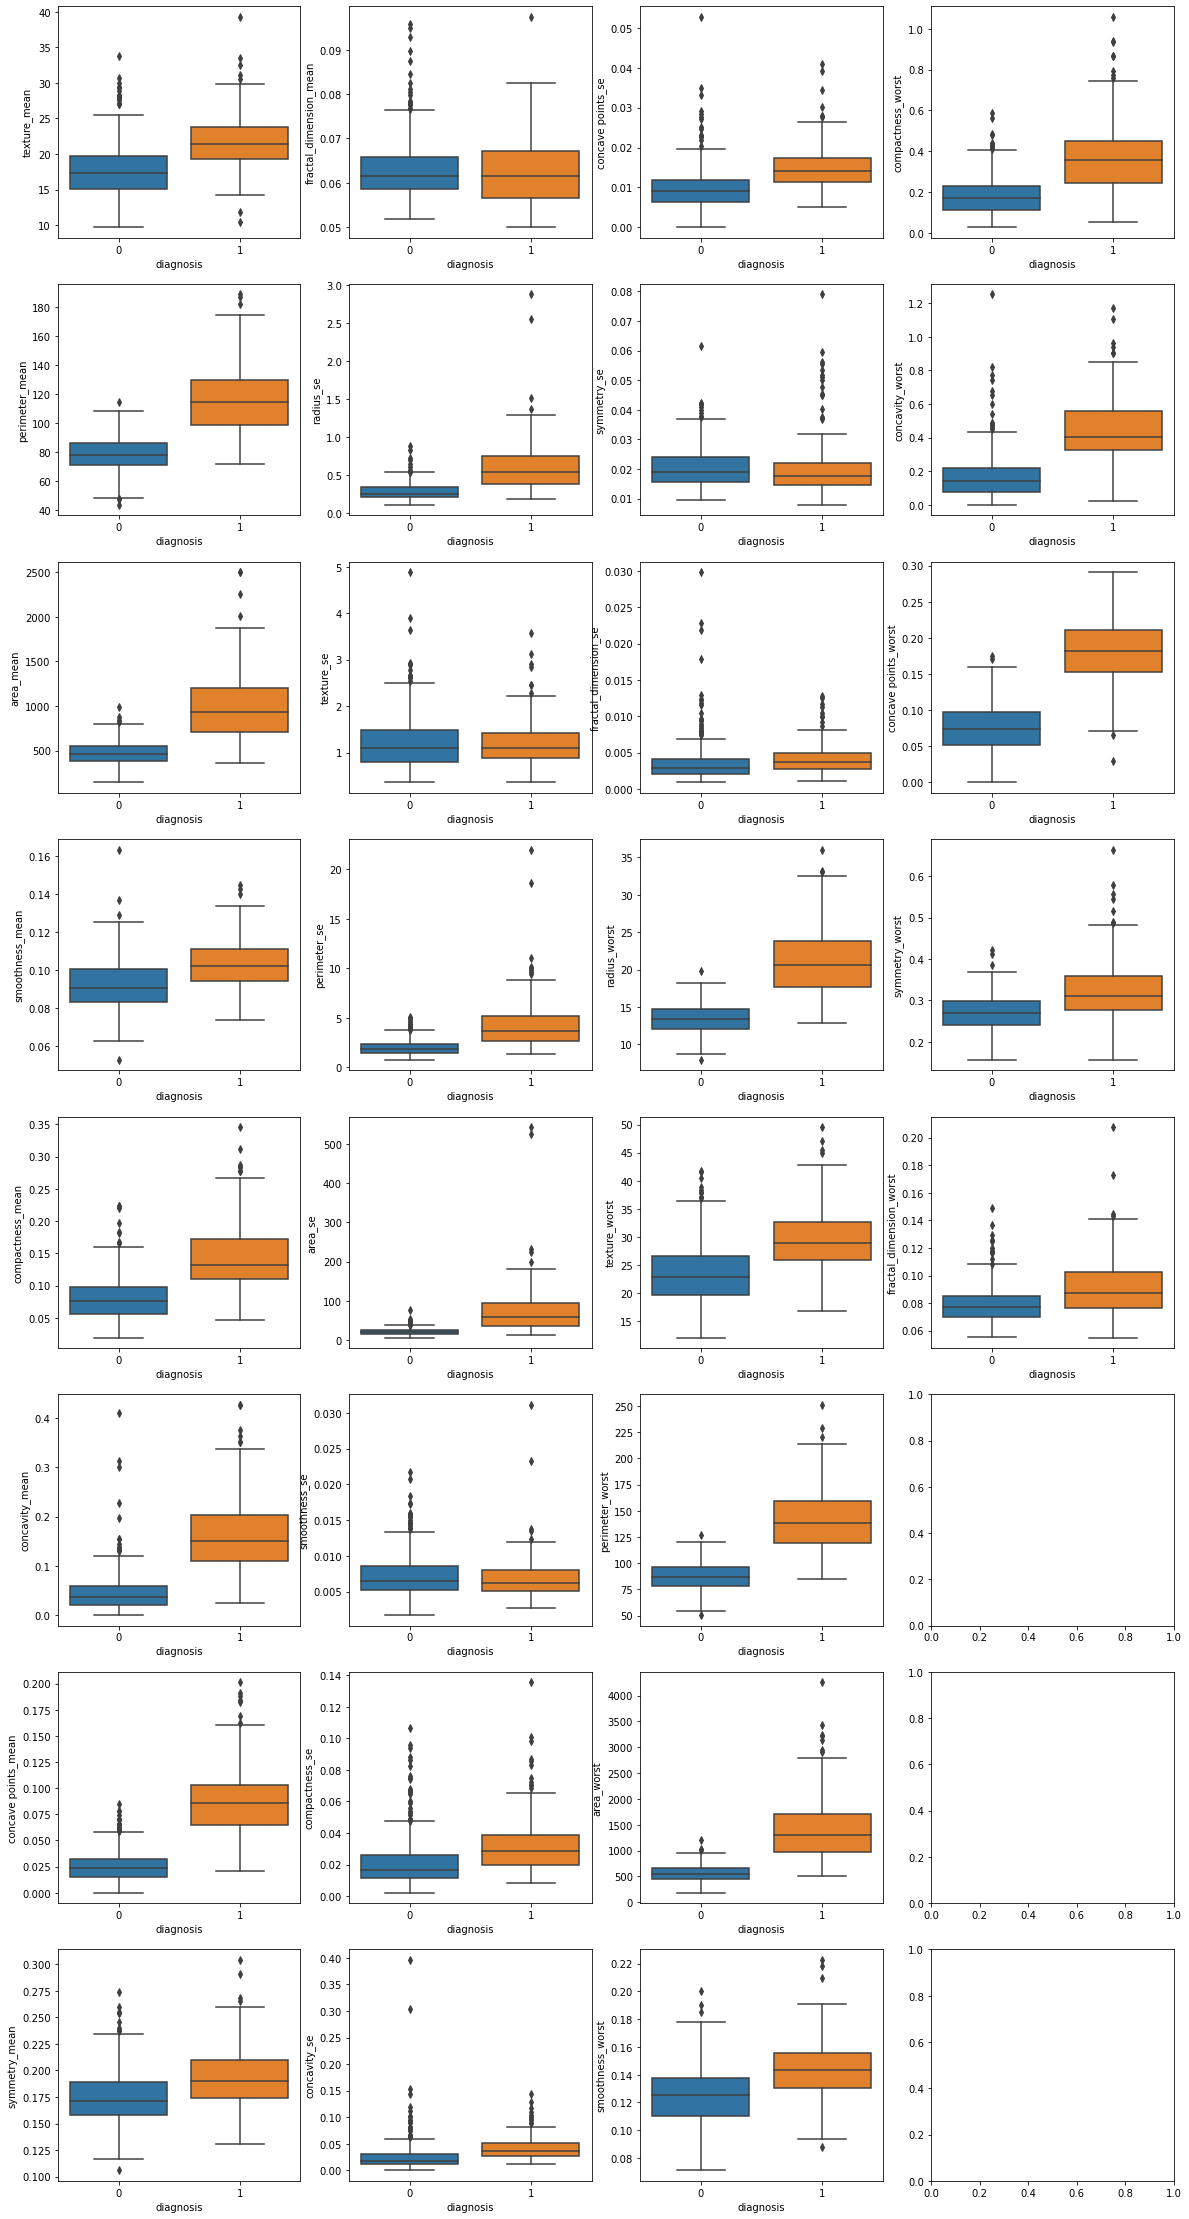

In [11]:
plot_explore(estimadores, data)

A partir de estas figuras se puede ver las diferencias entre poblaciones de cada variable para las dos categorías de la variable objetivo. Por ejemplo, en el gráfico de 'area worst' puede verse que para tumores benignos (diagnosis = 0) la población se encuentra entre 200 y 1000 mientras que para tumores malignos se encuentra entre 500 y 3000. Las variables con más diferencia entre los dos grupos más predictivas serán. 

Por tanto, se puede decidir si construir el modelo únicamente con estas variables o continuar con todas ellas. En este caso se continuirá con todas las variables y se comprobará al final si la precisión mejora usando unicamente las variables más correlacionadas. 

Para hacer la reducción de manera sencilla se eliminarán aquellas variables donde se superponga el rango intercuartil. 

In [12]:
corr_features = ['area_worst','concave points_mean','perimeter_worst','concavity_mean','area_se','compactness_mean',
                 'radius_worst','perimeter_se','concave points_worst','area_mean','concavity_worst','perimeter_mean',
                'compactness_worst']

print(corr_features)

['area_worst', 'concave points_mean', 'perimeter_worst', 'concavity_mean', 'area_se', 'compactness_mean', 'radius_worst', 'perimeter_se', 'concave points_worst', 'area_mean', 'concavity_worst', 'perimeter_mean', 'compactness_worst']


## Distribución de la muestra

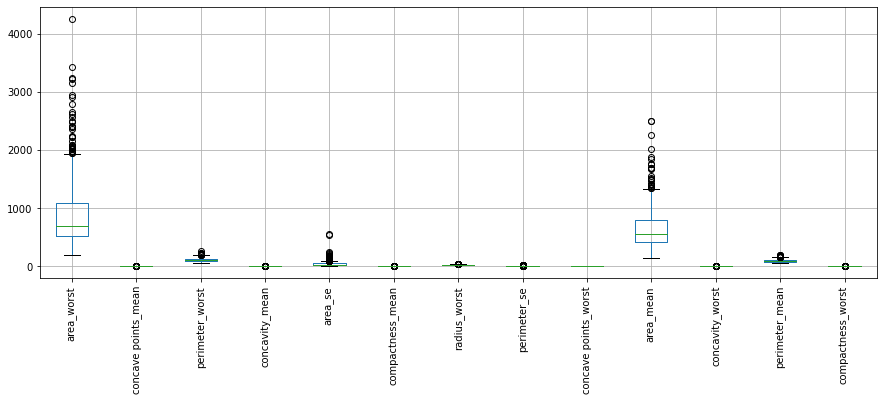

In [13]:
boxplot = data[corr_features].boxplot(figsize=(15,5),rot=90)  


A continuacion se realiza un estudio de la distribución de las varibles y de la presencia de valores anómalos. Como puede verse en la figura anterior algunas de la variables presentan valores numéricos mucho más grande que otras. Por tanto, y debido a alguno de los modelos que se aplicarán posteriormente, será necesario realizar una normalización de las variables para que estas no tengan un peso mayor que el resto. 

# Modelado
A continuación se presenta el modelado del predictor con distintos tipos de algoritmos. En primer lugar se divide el dataset en entrenamiento y test (80% y 20% de los datos respectivamente). Esto se realiza así ya que es necesario entrenar y calibrar los modelos con unos datos y por último, una vez se ha entrenado el modelo, se evalúa el modelo con otros datos totalmente nuevos. 

In [14]:
X = data.drop('diagnosis',axis=1)
Y = data['diagnosis']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state = 1234,shuffle = True)


Como se ha comentado anteriormente, normalizar los datos resulta conveniente para que ciertos modelos no otorguen un peso mayor a variables con datos mucho más grandes que otras. Por ejemplo, un modelo otorgaría mucho más peso a la variable salario anual que a la variable altura. 

In [15]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Regresión logística
En primer lugar se entrenará una regresion logística para ajustarse a los datos. La regresión logística resulta útil para los casos en los que se desea clasificar una variable en base a los datos de los predictores. Es similar a un modelo de regresión lineal pero está adaptado para modelos en los que la variable dependiente es dicotómica, es decir, puede tomar 2 valores. Puesto que se busca predecir el tipo de tumor, benigno (0) o maligno (1), resulta un modelo conveniente.
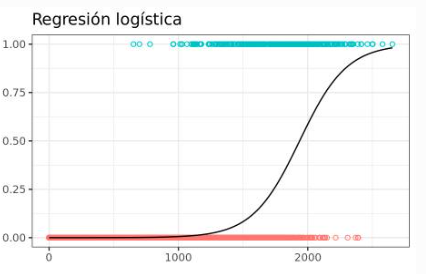

In [16]:
from sklearn.linear_model import LogisticRegression

Este modelo tiene una serie de hyperparámetros que mejoran el rendimiento del mismo. Por lo tanto, se utilizará una función para modificar estos parámetros y encontrar la mejor regresión logística posible. Los parámetros que se optimizarán son: 
- Penalty: que técnica de regularización se utiliza para evitar overfitting.  
- C: inversa de la fuerza de regularización. Cuanto mayor sea el valor más fuerte será la regularización. 

Esta función incorpora la capacidad de hacer validación cruzada. Esto consiste en dividir el dataset de entrenamiento en distintos bloques (cv) y entrenar y validar distintamente con ellos. De esta manera se obtiene la puntuacion promedio evitando caer en problemas de alta varianza o overfitting. 

In [17]:
from sklearn.model_selection import GridSearchCV
log_grid={"C":np.logspace(-3,3,7), "penalty":["none","l2"]}# l1 lasso l2 ridge

In [18]:
model_log = LogisticRegression(max_iter = 500)
model_log_cv=GridSearchCV(model_log,log_grid,cv=5)
model_log_cv.fit(X_train,Y_train)
#scores = cross_val_score(model_log, X_train, Y_train, cv=10)

C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ra

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l2']})

Los warnings del código no son un problema ya que indican que cuando no se aplica ninguna regularizacion se va a ignorar el parámetro que controla la fuerza de la regularización y ese comportamiento tiene sentido. 

In [19]:
print("tuned hpyerparameters :(best parameters) ",model_log_cv.best_params_)
print("accuracy :",model_log_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9780219780219781


## Random Forest
El modelo Random Forest es un muy popular dentro de las técnicas de aprendizaje automático puesto que tienen una alta capacidad de generalización para muchos problemas. Se pueden emplear para reducción de dimensionalidad, regresiones, clasificaciones, etc. 

Los algoritmos ensamblados son aquellos que utilizan en su interior modelos más sencillos para obtener las predicciones. Se distinguen entre bagging o boosting. Los de tipo baggin generan n modelos con n datasets de entrenamiendo muestreando con remplazamiento donde los modelos se procesan en paralelo. En los modelos tipo boosting se conectan los modelos en serie de manera que cada modelo aprende del error del modelo anterior. 

El modelo Random Forest es un algoritmo ensamblado de tipo baggin que contiene árboles de decisión en su interior. Cada uno de estos árboles se entrena con un dataset y en caso de perseguir una clasificación, se determina el output a través del resultado de la mayoria de los árboles. 
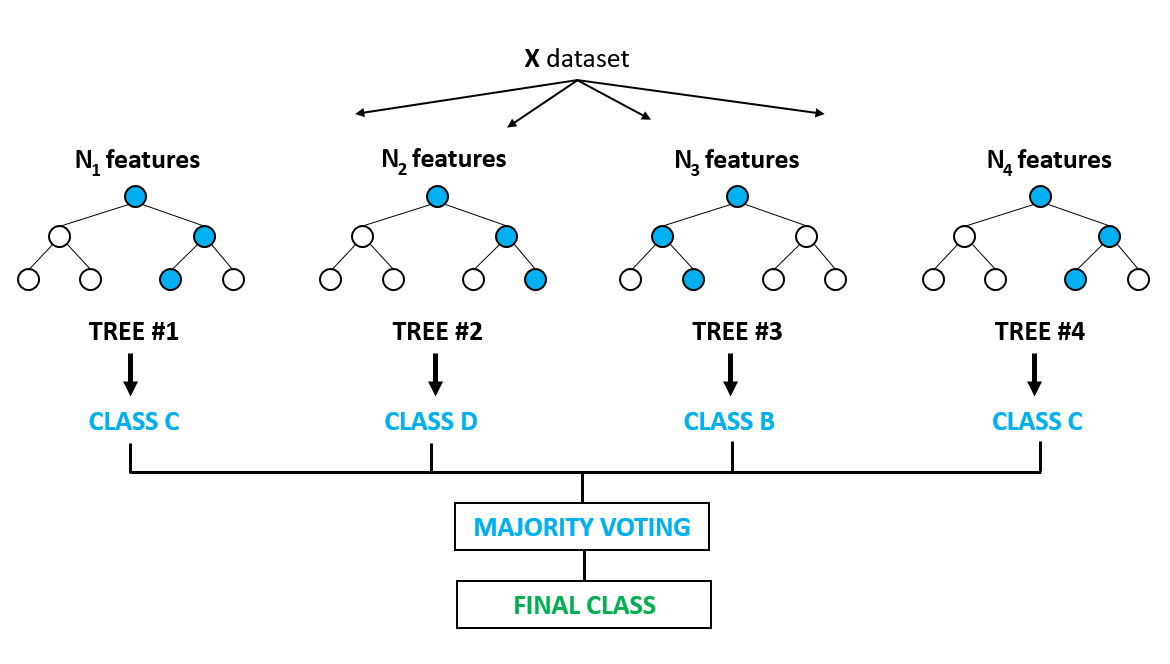

In [20]:
from sklearn.ensemble import RandomForestClassifier

Al igual que se hizo con la regresión logarítmica, este modelo tiene una serie de hyperparámetros que merece la pena optimizar para encontrar la mejor configuración posible. Estos son: 
- n_estimators: número de árboles que tendrá el modelo. 
- criterion: la función para medir la calidad de cada decisión del árbol. 
- max_depth: máxima profundidad del árbol. 

In [21]:
rf_grid={"n_estimators":np.arange(10, 110, 10), 
         "criterion":["gini","entropy"],
         "max_depth":[1,2,3,4,5]}

In [22]:
model_rf = RandomForestClassifier(random_state=42)
model_rf_cv=GridSearchCV(model_rf,rf_grid,cv=5)
model_rf_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [23]:
print("tuned hpyerparameters :(best parameters) ",model_rf_cv.best_params_)
print("accuracy :",model_rf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 60}
accuracy : 0.9714285714285713


## Reduccion de variables
A continuación se comprueba si entrenando el modelo de regresión logarítmica (el que mayor precisión ha mostrado en este caso) con una reducción de variables segun correlación, se consigue mejorar la precision actual de 0.978

In [24]:
X1 = data[corr_features]
Y1 = data['diagnosis']
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.20,random_state = 1234,shuffle = True)

X1_train = sc.fit_transform(X1_train)
X1_test = sc.fit_transform(X1_test)

model_log_cv1=GridSearchCV(model_log,log_grid,cv=5)
model_log_cv1.fit(X1_train,Y1_train)

C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ra

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l2']})

In [25]:
print("tuned hpyerparameters :(best parameters) ",model_log_cv1.best_params_)
print("accuracy :",model_log_cv1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9648351648351647


Se puede ver que la precisión baja a 0.964. Esto se debe a que en este tipo de modelos no solo importa la relacion de una variable con la variable objetivo sino tambien las relaciones entre las distintas variables. La combinación de dos variables puede ser más predictiva que otra variable más predictiva en solitario. 

## Evaluación de los modelos
A continuación se estudia en mayor detalle la fiabilidad de los modelos obtenidos.

In [26]:
model_final_log = sklearn.linear_model.LogisticRegression(max_iter = 500, C = 1, penalty = 'l2')
model_final_log.fit(X_train,Y_train)

model_final_rf = sklearn.ensemble.RandomForestClassifier(random_state=42,
                                                         criterion = 'entropy', 
                                                         max_depth = 4, 
                                                         n_estimators = 60) 
model_final_rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=60,
                       random_state=42)

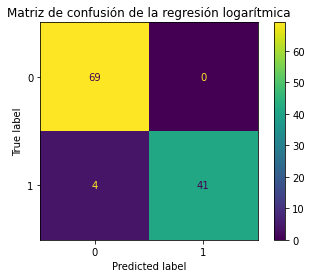

In [27]:
plot_confusion_matrix(model_final_log, X_test, Y_test)  
plt.title('Matriz de confusión de la regresión logarítmica')
plt.show()

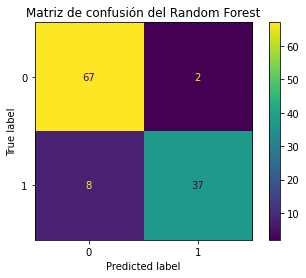

In [28]:
plot_confusion_matrix(model_final_rf, X_test, Y_test)  
plt.title('Matriz de confusión del Random Forest')
plt.show()

Teniendo en cuenta el tipo de problema a estudiar, donde se quiere predecir si un tumor es maligno o no, un falso negativo (Predicted = 0 y True = 1) puede ser muy peligroso ya que el paciente no recibiría la atención necesaria teniendo un tumor maligno. Por lo tanto es importante utilizar el modelo que minimice los falso negativos, en este caso la regresión logística. 

Tambien se puede evaluar este fenómeno a traves de la métrica Recall que evalua: 

(verdaderos positivos)/(verdadero positivo + falso negativo)

Finalmente se incluye el f1_score como medida generalizada de precisión de un modelo

In [29]:
y_pred_log = model_final_log.predict(X_test)
print('Recall de la regresión logarítmica: ', recall_score(Y_test, y_pred_log))
print('F-1 de la regresión logarítmica: ', f1_score(Y_test, y_pred_log))

Recall de la regresión logarítmica:  0.9111111111111111
F-1 de la regresión logarítmica:  0.9534883720930233


In [30]:
y_pred_rf  = model_final_rf.predict(X_test)
print('Recall del Random Forest: ', recall_score(Y_test, y_pred_rf))
print('F-1 del Random Forest: ', f1_score(Y_test, y_pred_rf))

Recall del Random Forest:  0.8222222222222222
F-1 del Random Forest:  0.8809523809523809


## Explicabilidad del modelo

In [31]:
import shap
explainer = shap.Explainer(model_final_log, X_train, feature_names=data.drop('diagnosis',axis=1).columns.values)
shap_values = explainer(X_test)

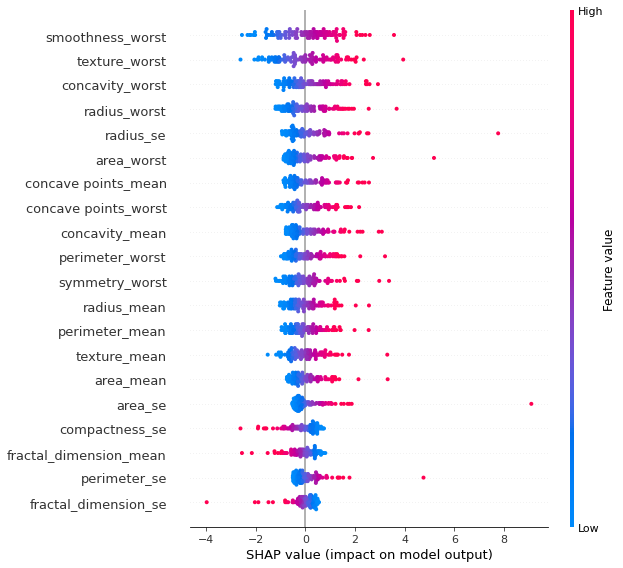

In [32]:
shap.summary_plot(shap_values, X_test)

La gráfica SHAP.summary_plot permite mostrar las variables más importantes del modelo y su rango de efectos sobre el dataset. De esta gráfica puede extraerse que: 
- La variable smoothness_worst tiene el mayor efecto sobre si el tumor es benigno o maligno. 
- A medida que aumenta el valor de esta variable mayor es la probabilidad de que el tumor sea maligno. 
- En el resto de variables tambien hay una relacion directa entre el valor de esta y la probabilidad de un tumor maligno, a excepción de las variables compactness_se, flactal_dimension_mean y fractal_dimension_se, donde la relación es inversa. 

In [33]:
fin = time.time()
print('Tiempo de ejecución del notebook:', fin-inicio) 

Tiempo de ejecución del notebook: 49.18693232536316
